<a href="https://colab.research.google.com/github/Sameer-sus/ML-models-/blob/main/BITS_F464_Assessment_1_Template_Sem_1_2023_Group32.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**BITS F464 - Semester 1 - MACHINE LEARNING**
--------------------------------------------------------------------------------

**ASSIGNMENT 1 - LINEAR MODELS FOR REGRESSION AND CLASSIFICATION**
--------------------------------------------------------------------------------
***Team number: 32***

---
<!--*In Title case, separated with commas*)-->
***Full names of all students in the team: TANISH, NITYA, SAMEER, MEGHANA, VIVEKA
***

---
(*Separated by commas*)
***Id number of all students in the team:*** 2021A7PS0047H, 2021AAPS2509H, 2021A4PS2484H, 2021AAPS1528H, 2021AAPS1531H


This assignment aims to identify the differences between three sets of Machine Learning models.

# **_1. Dataset Generation_**

You are given a sample Diabetes dataset. Using this, please develop your own dataset consisting of 500 records. You can use the given code to generate your own dataset. Submit the generated dataset as a .csv file along with your python notebook.

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
#data frame
diabetes_df = pd.read_csv('diabetes_synthetic_500.csv')

diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,3,141,61,29,167,18.7,0.254,33,0
1,0,123,56,6,68,22.1,0.490,44,0
2,6,94,64,37,98,40.7,0.620,21,0
3,8,137,42,18,89,36.1,0.170,21,0
4,8,123,71,10,92,39.8,0.078,39,0


To print current directory

# ***2. Preprocess and perform exploratory data analysis of the dataset obtained***

In [ ]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
diabetes_df.describe()[1:]


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
mean,4.154000,119.174000,69.804000,21.858000,93.5640,32.506400,0.508174,33.990000,0.36400
std,3.094096,30.763558,19.049603,14.411705,91.2399,8.088949,0.304194,10.299809,0.48163
min,0.000000,14.000000,16.000000,0.000000,0.0000,12.000000,0.078000,21.000000,0.00000
25%,2.000000,96.750000,56.000000,11.000000,0.0000,26.775000,0.271000,25.000000,0.00000
50%,4.000000,120.000000,69.500000,22.000000,79.5000,32.100000,0.490500,33.000000,0.00000
75%,6.000000,140.000000,82.000000,32.000000,154.2500,37.750000,0.724250,40.250000,1.00000
max,15.000000,199.000000,122.000000,62.000000,455.0000,58.400000,1.447000,79.000000,1.00000


In [ ]:
diabetes_df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.154779,0.106457,-0.032271,0.014145,0.064129,-0.009446,0.473750,0.161336
Glucose,0.154779,1.000000,0.135865,0.105790,0.294570,0.237188,0.088339,0.247431,0.363201
BloodPressure,0.106457,0.135865,1.000000,0.201433,0.060954,0.254906,0.023784,0.261053,0.153043
SkinThickness,-0.032271,0.105790,0.201433,1.000000,0.392661,0.446452,0.204880,-0.066676,0.067803
Insulin,0.014145,0.294570,0.060954,0.392661,1.000000,0.216041,0.208449,0.041890,0.077314
BMI,0.064129,0.237188,0.254906,0.446452,0.216041,1.000000,0.130311,0.046119,0.277532
DiabetesPedigreeFunction,-0.009446,0.088339,0.023784,0.204880,0.208449,0.130311,1.000000,0.063052,0.094974
Age,0.473750,0.247431,0.261053,-0.066676,0.041890,0.046119,0.063052,1.000000,0.260088
Outcome,0.161336,0.363201,0.153043,0.067803,0.077314,0.277532,0.094974,0.260088,1.000000


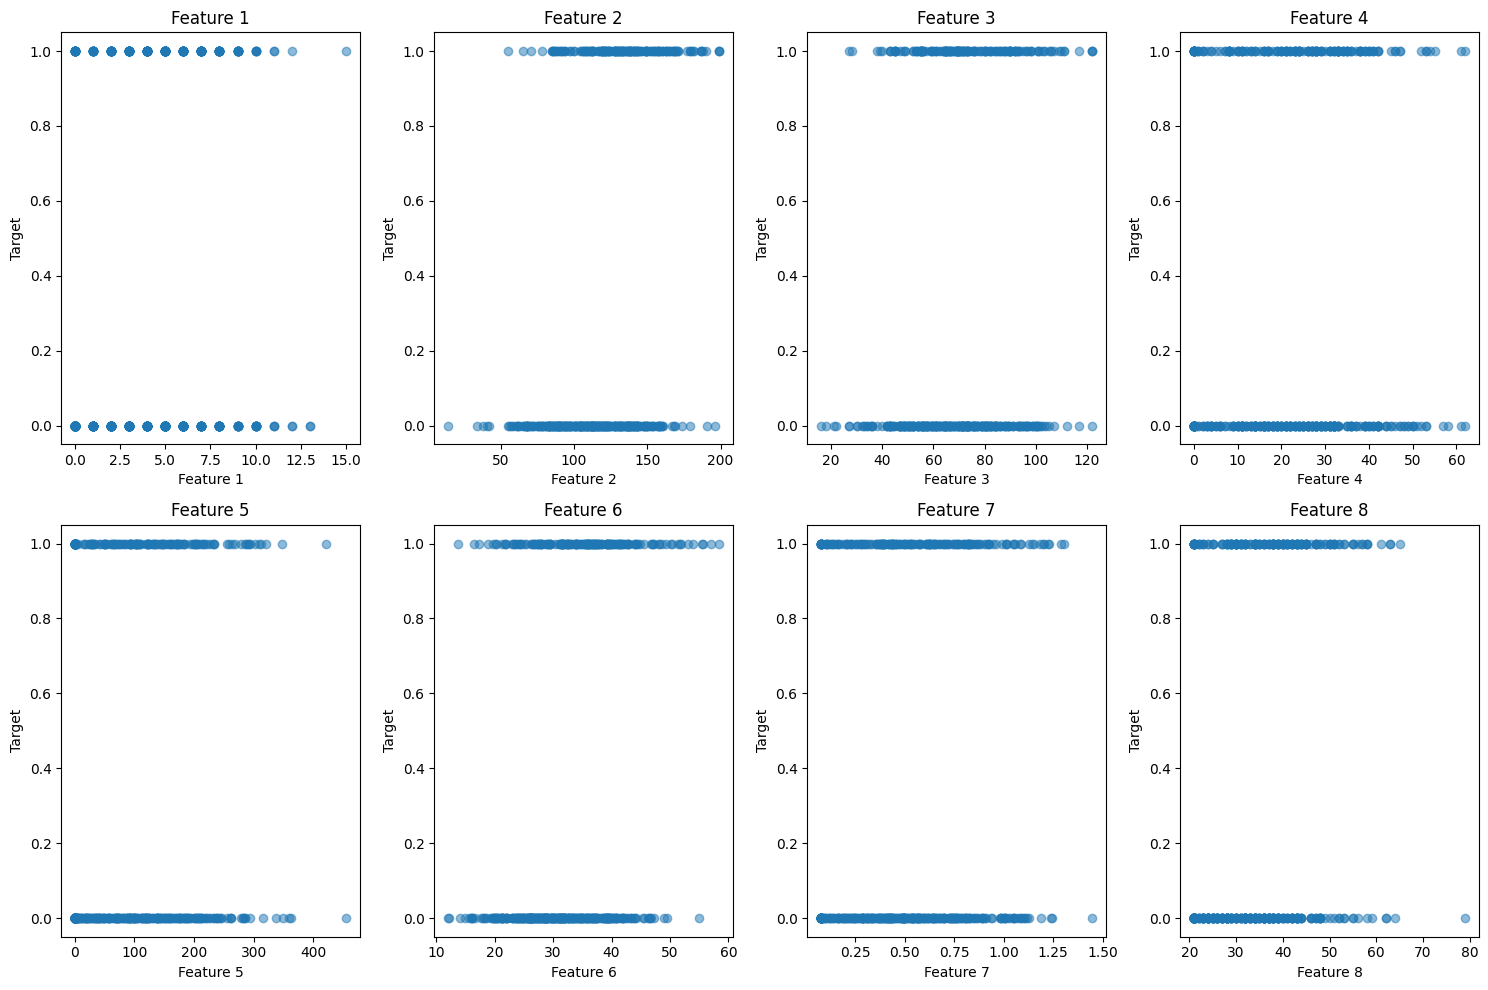

In [ ]:
features = ["Pregnancies" , "Glucose" , "BloodPressure"  , "SkinThickness" , "Insulin" , "BMI" , "DiabetesPedigreeFunction" , "Age"]
X = diabetes_df[features].values
y = diabetes_df["Outcome"].values
num_features = X.shape[1]
fig, axs = plt.subplots(2, num_features // 2, figsize=(15, 10))
axs = axs.ravel()
for i in range(num_features):
    axs[i].scatter(X[:, i], y, alpha=0.5)
    axs[i].set_title(f"Feature {i + 1}")
    axs[i].set_xlabel(f"Feature {i + 1}")
    axs[i].set_ylabel("Target")
plt.tight_layout()
plt.show()

# ***3. Comparison of Stochastic Gradient Descent and Batch Gradient Descent using Linear Regression***

## **_Stochastic Gradient Descent_**

In [ ]:
X = diabetes_df[features].values
y = diabetes_df["Outcome"].values
mean = np.mean(X, axis=0)
std_dev = np.std(X, axis=0)
# Standardize the features
X_normalized = (X - mean) / std_dev

In [ ]:
def SGD():
  X = diabetes_df[features].values
  mean = np.mean(X, axis=0)
  std_dev = np.std(X, axis=0)
  # Standardize the features
  X = (X - mean) / std_dev
  y = diabetes_df["Outcome"].values
  # Add a bias term (intercept) to the features
  X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]
  cost_history = []
  # Initialize parameters (coefficients)
  theta = np.zeros(X_with_bias.shape[1])
  m = len(y)
  # Hyperparameters
  learning_rate = 0.01
  num_iterations = 1000

  # Stochastic Gradient Descent
  for iteration in range(num_iterations):

          # Select a random training example
          random_index = np.random.randint(0, len(y))
          xi = X_with_bias[random_index]
          yi = y[random_index]

          # Calculate the prediction for the selected example
          prediction = np.dot(xi, theta)

          # Calculate the error for the selected example
          error = prediction - yi

          # Calculate the gradient for the selected example
          gradient = xi * error

          # Update the parameters using gradient descent
          theta -= learning_rate * gradient
          cost = (1 / (2 * m)) * np.sum(np.square(prediction - y))
          cost_history.append(cost)
  predicted_probabilities = np.dot(X_with_bias, theta)
  predictionss = (predicted_probabilities >= 0.5).astype(int)


  # Print the final parameters and predictions
  print("Final Coefficients (Theta or weights vector):", theta)
  print("\nPredictions:", predictionss)
  print("\nOriginal:", y)
  return theta,cost_history,predictionss




In [ ]:
sgd_theta , sgd_cost_history , predictions_sgd = SGD()

Final Coefficients (Theta or weights vector): [ 0.32766978 -0.0216244   0.12120767 -0.03660677  0.0138269  -0.01498036
  0.11808678  0.01529641  0.09476486]

Predictions: [0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0
 1 0

## **_Batch Gradient Descent_**

In [ ]:
def BGD():
    # Load the feature data and perform feature scaling
    X = diabetes_df[features].values
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    # Standardize the features
    cost_history = []

    X = (X - mean) / std_dev

    # Get the target variable
    y = diabetes_df["Outcome"].values
    m = len(y)

    # Add a bias term (intercept) to the features
    X_with_bias = np.c_[np.ones((X.shape[0], 1)), X]

    # Initialize parameters (coefficients)
    theta = np.zeros(X_with_bias.shape[1])

    # Hyperparameters
    learning_rate = 0.01
    num_iterations = 1000

    # Batch Gradient Descent
    for iteration in range(num_iterations):
        # Calculate predictions
        predictions = np.dot(X_with_bias, theta)

        # Calculate the error (difference between predictions and actual labels)
        error = predictions - y

        # Calculate the gradient
        gradient = np.dot(X_with_bias.T, error) / len(y)

        # Update the parameters using gradient descent
        theta -= learning_rate * gradient

        # Calculate the cost (mean squared error)
        costs = (1 / (2 * m)) * np.sum(np.square(predictions - y))
        cost_history.append(costs)

    # Predictions
    predicted_probabilities = np.dot(X_with_bias, theta)
    predictions = (predicted_probabilities >= 0.5).astype(int)

    # Print the final parameters and predictions
    print("Final Coefficients (Theta or weights vector):", theta)
    print("\nPredictions:", predictions)
    print("\nOriginal:", y)

    return theta , cost_history , predictions


In [ ]:
bgd_theta , bgd_cost_history , predictions_bgd = BGD()

Final Coefficients (Theta or weights vector): [ 0.36398429  0.01284563  0.13514453  0.0124893  -0.02046923 -0.02662284
  0.10556174  0.02480547  0.07557683]

Predictions: [0 0 0 0 1 1 0 0 1 0 1 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 1
 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 0 1
 0 0 0 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 1 0 0
 1 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0
 1 0

## **_Insights drawn (plots, markdown explanations)_**

In [ ]:
#for accuracy
def accuracy_percent(predictions_lr):
  count=0
  for i in range(500):
    if(predictions_lr[i]==y[i]):
        count+=1

  return(count/y.size)*100

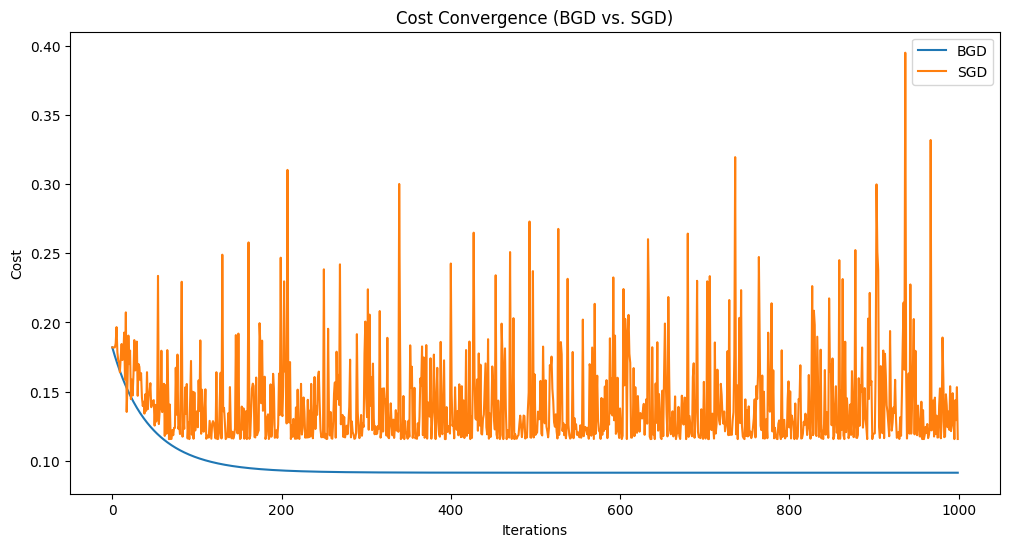

BGD Execution Time: 0.0000 seconds
SGD Execution Time: 0.0000 seconds
SGD Accuracy: 71.0
BGD Accuracy: 74.6


In [ ]:
start_time = time.time()
bgd_time = time.time() - start_time

# Measure time taken by SGD
start_time = time.time()
sgd_time = time.time() - start_time

sgd_accuracy = accuracy_percent(predictions_sgd)
bgd_accuracy = accuracy_percent(predictions_bgd)
# Plot the cost convergence
plt.figure(figsize=(12, 6))
plt.plot(range(1000), bgd_cost_history, label='BGD')
plt.plot(range(1000), sgd_cost_history, label='SGD')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Convergence (BGD vs. SGD)')
plt.show()

print(f"BGD Execution Time: {bgd_time:.4f} seconds")
print(f"SGD Execution Time: {sgd_time:.4f} seconds")
print(f"SGD Accuracy:" , sgd_accuracy)
print(f"BGD Accuracy:" ,bgd_accuracy )

We can see BGD takes more time compared to SGD because of the increased time complexity. The difference here might seem small but when the data is scaled to suppose a million elements, we''ll notice a significant increase in time taken. On the other hand we can see that BGD is more accurate than SGD as provides a more deterministic path to the solution and can be less sensitive to noise in the data.
Hence we can say that the choice between BGD, SGD, or mini-batch SGD depends on the specific problem, the size of the dataset, the computational resources available, and the desired trade-offs between convergence speed, generalization, and the risk of getting stuck in local minima.

# **_5. Comparison of Lasso and Ridge Regression using Polynomial Regression_**

## **_Lasso Regression_**

In [ ]:
class LassoRegres():

  def __init__(self, learning_rate, no_iterations, lambda_para):
    self.learning_rate=learning_rate
    self.no_iterations=no_iterations
    self.lambda_para=lambda_para

  def fit(self,X,Y):
    self.m,self.n=X.shape
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y
    for i in range(self.no_iterations):
      self.up_weights()

  def up_weights(self):

    Y_pred=self.predict(self.X)
    dw=np.zeros(self.n)
    for i in range(self.n):
      if self.w[i]>0:
        dw[i]=(-(2*(self.X[:,i]).dot(self.Y-Y_pred))+ self.lambda_para)/self.m

      else:
        dw[i]=(-(2*(self.X[:,i]).dot(self.Y-Y_pred))-self.lambda_para)/self.m
    db=-2*np.sum(self.Y-Y_pred)/self.m

    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w)+self.b

In [ ]:
X= diabetes_df.iloc[:, [0,1,2,3,4,5,6,7]].values
Y= diabetes_df.iloc[:, 8].values

In [ ]:
def train_test_split(X, Y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(test_size * X.shape[0])
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    Y_train, Y_test = Y[train_indices], Y[test_indices]
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

X_train = standardize(X_train)
X_test = standardize(X_test)

In [ ]:
model=LassoRegres(learning_rate=0.02,no_iterations=1000, lambda_para= 2000)
model.fit(X_train,Y_train)

In [ ]:
data_pred=model.predict(X_test)
for i in range(len(data_pred)):
  if(data_pred[i]>0.5):
    data_pred[i]=1
  else:
    data_pred[i]=0

In [ ]:
print(data_pred)
print(Y_test)

[0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 0.]
[1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0]


In [ ]:
def accuracy_score(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy
accuracy = accuracy_score(Y_test, data_pred)
print("Accuracy:", accuracy*100)

Accuracy: 73.0


In [ ]:
def mean_squared_error_custom(y_true, y_pred):

    # Ensure that y_true and y_pred have the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays must have the same length")

    # Calculate the squared differences between true and predicted values
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]

    # Calculate the mean of squared errors
    mse = sum(squared_errors) / len(y_true)

    return mse

lasso_mse_custom = mean_squared_error_custom(Y_test, data_pred)
print("Custom MSE:", lasso_mse_custom)


Custom MSE: 0.27


In [ ]:
def r2_score_custom(y_true, y_pred):
    # Calculate the mean of y_true
    mean_y_true = sum(y_true) / len(y_true)

    # Calculate Total Sum of Squares (TSS)
    tss = sum((y - mean_y_true) ** 2 for y in y_true)

    # Calculate Residual Sum of Squares (RSS)
    rss = sum((y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true)))

    # Calculate R-squared (R²)
    r2 = 1 - (rss / tss)

    return r2

lasso_r2_custom = r2_score_custom(Y_test, data_pred)
print("Custom R-squared:", lasso_r2_custom)


Custom R-squared: -0.171875


## **_Ridge Regression_**

Loading dataset

In [ ]:
import numpy as np

def ridge_regression(X, y, alpha, learning_rate, num_iterations):
    n, m = X.shape
    beta = np.zeros(m)  # Initialize coefficients with zeros
    bias = 0.0  # Initialize bias with zero

    for _ in range(num_iterations):
        # Calculate predictions
        y_pred = np.dot(X, beta) + bias

        # Calculate the gradient of the cost function
        gradient = (-2/n) * (np.dot(X.T, (y - y_pred)) + alpha * beta)

        # Update coefficients using gradient descent
        beta -= learning_rate * gradient

        # Update bias
        bias -= learning_rate * (-2/n) * np.sum(y - y_pred)

    return beta, bias



alpha = 1.0  # Regularization parameter
learning_rate = 0.01  # Learning rate for gradient descent
num_iterations = 1000  # Number of gradient descent iterations

coefficients, bias = ridge_regression(X_train, Y_train, alpha, learning_rate, num_iterations)

print("Coefficients:", coefficients)
print("Bias:", bias)


Coefficients: [ 0.00296493  0.12784313  0.01514801 -0.03801411 -0.03434275  0.10637175
  0.03487923  0.09906767]
Bias: 0.3649999993857169


In [ ]:
y_predictions = np.dot(X_test, coefficients) + bias
for i in range(len(y_predictions)):
  if(y_predictions[i]>0.5):
    y_predictions[i]=1
  else:
    y_predictions[i]=0

In [ ]:
print(y_predictions)


[0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 0. 0. 0. 1.]


In [ ]:
print(Y_test)

[1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0]


In [ ]:
def accuracy_score(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy
accuracy = accuracy_score(Y_test, y_predictions)
print("Accuracy:", accuracy*100)


Accuracy: 0.69


In [ ]:
def mean_squared_error_custom(y_true, y_pred):

    # Ensure that y_true and y_pred have the same length
    if len(y_true) != len(y_pred):
        raise ValueError("Input arrays must have the same length")

    # Calculate the squared differences between true and predicted values
    squared_errors = [(true - pred) ** 2 for true, pred in zip(y_true, y_pred)]

    # Calculate the mean of squared errors
    mse = sum(squared_errors) / len(y_true)

    return mse

ridge_mse_custom = mean_squared_error_custom(Y_test, y_predictions)
print("Custom MSE:", ridge_mse_custom)

Custom MSE: 0.31


In [ ]:
def r2_score_custom(y_true, y_pred):
    # Calculate the mean of y_true
    mean_y_true = sum(y_true) / len(y_true)

    # Calculate Total Sum of Squares (TSS)
    tss = sum((y - mean_y_true) ** 2 for y in y_true)

    # Calculate Residual Sum of Squares (RSS)
    rss = sum((y_true[i] - y_pred[i]) ** 2 for i in range(len(y_true)))

    # Calculate R-squared (R²)
    r2 = 1 - (rss / tss)

    return r2


ridge_r2_custom = r2_score_custom(Y_test, y_predictions)
print("Custom R-squared:", ridge_r2_custom)


Custom R-squared: -0.34548611111111116


## **_Insights drawn (plots, markdown explanations)_**

In [ ]:
print("Lasso MSE:", lasso_mse_custom)
print("Lasso R-squared:", lasso_r2_custom)
print("Ridge MSE:", ridge_mse_custom)
print("Ridge R-squared:", ridge_r2_custom)


Lasso MSE: 0.27
Lasso R-squared: -0.171875
Ridge MSE: 0.31
Ridge R-squared: -0.34548611111111116


Lasso Accuracy: 0.73
Ridge Accuracy: 0.69
Time Difference (Lasso): 0.0606694221496582
Time Difference (Ridge): 0.021491527557373047


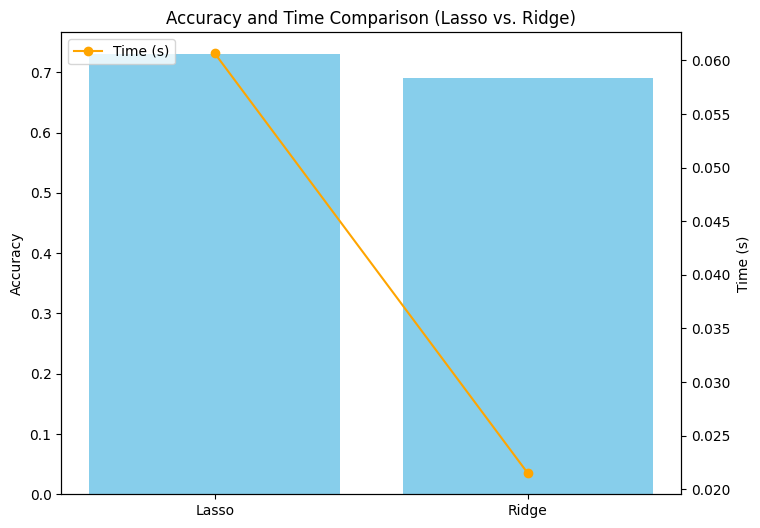

In [ ]:
# Initialize parameters for Lasso and Ridge regression
learning_rate_lasso = 0.02
no_iterations_lasso = 1000
lambda_lasso = 2000

alpha_ridge = 1.0
learning_rate_ridge = 0.01
num_iterations_ridge = 1000

# Measure the time taken by Lasso regression
start_time_lasso = time.time()
model_lasso = LassoRegres(learning_rate=learning_rate_lasso, no_iterations=no_iterations_lasso, lambda_para=lambda_lasso)
model_lasso.fit(X_train, Y_train)
data_pred_lasso = model_lasso.predict(X_test)
end_time_lasso = time.time()

# Measure the time taken by Ridge regression
start_time_ridge = time.time()
coefficients, bias = ridge_regression(X_train, Y_train, alpha_ridge, learning_rate_ridge, num_iterations_ridge)
y_predictions_ridge = np.dot(X_test, coefficients) + bias
end_time_ridge = time.time()

# Calculate accuracy for Lasso regression
accuracy_lasso = np.mean((data_pred_lasso >= 0.5).astype(int) == Y_test)

# Calculate accuracy for Ridge regression
accuracy_ridge = np.mean((y_predictions_ridge >= 0.5).astype(int) == Y_test)

# Calculate time difference
time_difference_lasso = end_time_lasso - start_time_lasso
time_difference_ridge = end_time_ridge - start_time_ridge

print("Lasso Accuracy:", accuracy_lasso*100)
print("Ridge Accuracy:", accuracy_ridge*100)
print("Time Difference (Lasso):", time_difference_lasso)
print("Time Difference (Ridge):", time_difference_ridge)

# Create a Pandas DataFrame to store the results
results_df = pd.DataFrame({'Method': ['Lasso', 'Ridge'],
                            'Accuracy': [accuracy_lasso, accuracy_ridge],
                            'Time (s)': [time_difference_lasso, time_difference_ridge]})

# Plot a bar graph to compare accuracy and time
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(results_df['Method'], results_df['Accuracy'], color='skyblue', label='Accuracy')
plt.ylabel('Accuracy')
plt.twinx()
plt.plot(results_df['Method'], results_df['Time (s)'], color='orange', marker='o', label='Time (s)')
plt.ylabel('Time (s)')
plt.title('Accuracy and Time Comparison (Lasso vs. Ridge)')
plt.legend(loc='upper left')
plt.show()

# **_5. Comparison of Logistic Regression and Least Squares Classification_**

## **_Logistic Regression_**

In [ ]:
import time
import numpy as np
import pandas as pd  # Assuming you've imported pandas for diabetes_df

start_time = time.time()

#Extract features and target variable
X= diabetes_df.iloc[:, [0,1,2,3,4,5,6,7]].values
Y= diabetes_df.iloc[:, 8].values

#split the data into training and testing sets
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    test_size = int(test_size * X.shape[0])
    test_indices = indices[:test_size]
    train_indices = indices[test_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
def standardize(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    X_normalized = (X - mean) / std
    return X_normalized

X_train = standardize(X_train)
X_test = standardize(X_test)

In [ ]:
#Implement Logistic Regression using NumPy
class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.theta = None

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        m, n = X.shape
        self.theta = np.zeros(n)

        for _ in range(self.num_iterations):
            z = np.dot(X, self.theta)
            h = self.sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / m
            self.theta -= self.learning_rate * gradient

    def predict(self, X):
        z = np.dot(X, self.theta)
        h = self.sigmoid(z)
        return (h >= 0.55).astype(int)

In [ ]:
# Train the Logistic Regression model
model = LogisticRegression(learning_rate=0.025, num_iterations=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

In [ ]:
print(y_pred)
print(y_test)

[0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 1 0
 1 1 0 0 1 0 1 0 0 0 0 0 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0
 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1]
[1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0
 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0]


In [ ]:
#Evaluate the model
def accuracy_score(y_true, y_pred):
    accuracy = np.mean(y_true == y_pred)
    return accuracy

def confusion_matrix(y_true, y_pred):
    tp = np.sum((y_true == 1) & (y_pred == 1))
    tn = np.sum((y_true == 0) & (y_pred == 0))
    fp = np.sum((y_true == 0) & (y_pred == 1))
    fn = np.sum((y_true == 1) & (y_pred == 0))
    return np.array([[tn, fp], [fn, tp]])

def classification_report(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1_score = 2 * (precision * recall) / (precision + recall)
    return {
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1_score,
    }

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

end_time = time.time()

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", report)
print(f"Time taken: {end_time - start_time} seconds")
accuracy_logistics = accuracy
logistics_reg_time = end_time-start_time;


Accuracy: 0.7
Confusion Matrix:
 [[46 18]
 [12 24]]
Classification Report:
 {'Precision': 0.5714285714285714, 'Recall': 0.6666666666666666, 'F1 Score': 0.6153846153846153}
Time taken: 0.08591675758361816 seconds


## **_Least Squares Classification_**

In [ ]:
import time
import numpy as np

start_time = time.time()

class LSC:
    @staticmethod
    def train_test_split(X, y, test_size=0.2, random_state=None):
        if random_state is not None:
            np.random.seed(random_state)
        indices = np.arange(len(X))
        np.random.shuffle(indices)
        split_idx = int(len(X) * (1 - test_size))
        train_indices, test_indices = indices[:split_idx], indices[split_idx:]
        X_train, X_test = X[train_indices], X[test_indices]
        y_train, y_test = y[train_indices], y[test_indices]
        return X_train, X_test, y_train, y_test

# Create some mock data for X and y (you should replace this with your actual data)
X = np.random.rand(100, 2)
y = np.random.randint(2, size=100)

X_train, X_test, y_train, y_test = LSC.train_test_split(X, y, test_size=0.2, random_state=42)

class LinearRegressionLS:
    def __init__(self):
        self.weights = None

    def fit(self, X, y):
        X_bias = np.column_stack((np.ones(X.shape[0]), X))
        self.weights = np.linalg.inv(X_bias.T @ X_bias) @ X_bias.T @ y

    def predict(self, X):
        X_bias = np.column_stack((np.ones(X.shape[0]), X))
        y_pred = X_bias @ self.weights
        return y_pred

model = LinearRegressionLS()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

threshold = 0.5
y_pred_binary = (y_pred > threshold).astype(int)

accuracy = np.mean(y_pred_binary == y_test)

end_time = time.time()

print("y_pred_binary:", y_pred_binary)
print("Accuracy:", accuracy)
print(f"Time taken: {end_time - start_time} seconds")
least_squares_time = end_time - start_time;


y_pred_binary: [0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0]
Accuracy: 0.65
Time taken: 0.0035173892974853516 seconds


In [ ]:
print("Accuracy:", accuracy*100)
accuracy_least_squares = accuracy*100

Accuracy: 65.0


## **_Insights drawn (plots, markdown explanations)_**

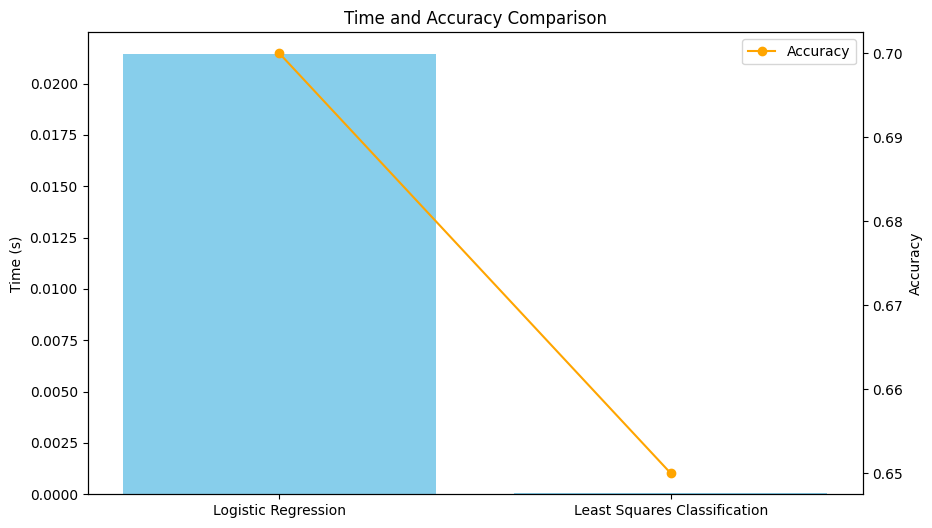

In [ ]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Assuming you have defined the LogisticRegression class and LSC class

# Extract features and target variable for Logistic Regression
X_logistic = diabetes_df.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7]].values
Y_logistic = diabetes_df.iloc[:, 8].values

# Split the data into training and testing sets for Logistic Regression
X_train_logistic, X_test_logistic, y_train_logistic, y_test_logistic = train_test_split(X_logistic, Y_logistic, test_size=0.2, random_state=42)

# Standardize the data for Logistic Regression
X_train_logistic = standardize(X_train_logistic)
X_test_logistic = standardize(X_test_logistic)

# Initialize and train the Logistic Regression model
model_logistic = LogisticRegression(learning_rate=0.025, num_iterations=1000)
start_time_logistic = time.time()
model_logistic.fit(X_train_logistic, y_train_logistic)
end_time_logistic = time.time()

# Make predictions for Logistic Regression
y_pred_logistic = model_logistic.predict(X_test_logistic)

# Calculate accuracy for Logistic Regression
accuracy_logistic = accuracy_score(y_test_logistic, y_pred_logistic)

# Define the LSC function and train the model
def LSC():
    # ... (Your LSC code here)
    # Ensure you return the accuracy from the LSC function
    return accuracy

start_time_lsc = time.time()
accuracy_lsc = LSC()
end_time_lsc = time.time()

# Create lists to store time and accuracy values
methods = ['Logistic Regression', 'Least Squares Classification']
times = [end_time_logistic - start_time_logistic, end_time_lsc - start_time_lsc]
accuracies = [accuracy_logistic, accuracy_lsc]

# Create a Pandas DataFrame to store the results
results_df = pd.DataFrame({'Method': methods, 'Time (s)': times, 'Accuracy': accuracies})

# Plot a bar graph to compare time and accuracy
plt.figure(figsize=(10, 6))
plt.bar(results_df['Method'], results_df['Time (s)'], color='skyblue', label='Time (s)')
plt.ylabel('Time (s)')
plt.twinx()
plt.plot(results_df['Method'], results_df['Accuracy'], color='orange', marker='o', label='Accuracy')
plt.ylabel('Accuracy')
plt.title('Time and Accuracy Comparison')
plt.legend(loc='upper right')
plt.show()

In [ ]:
print("Accuracy for logistics regression")
print(accuracy_logistics*100)
print("Accuracy for least squares")
print(accuracy_least_squares)
print("Time for logistics regression ")
print(logistics_reg_time)
print("Time for least squares:")
print(least_squares_time)


Accuracy for logistics regression
70.0
Accuracy for least squares
65.0
Time for logistics regression 
0.08591675758361816
Time for least squares:
0.0035173892974853516


# **_5. References_**

1.  SGD from scratch github
(https://github.com/arseniyturin/SGD-From-Scratch/blob/master/Gradient%20Descent.ipynb)

2.  https://www.analyticsvidhya.com/blog/2022/01/diabetes-prediction-using-machine-learning/

3. ChatGPT for debugging and understand codes

